In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten,Dropout
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Lambda,Dense, Input, Activation, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
import pickle 
from PIL import Image
import os
import cv2
import math
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import random
import json
import matplotlib.image as mping
from sklearn.cross_validation import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_csvfile():
    data = pd.read_csv('driving_log.csv', names=['center', 'left', 'right', 'centerval', 'leftval', 'rightval', 'speedval'] )
    return data

In [3]:

data=get_csvfile()
print("data size is ",len(data))


x = data[['center', 'left', 'right']].values
y = data['centerval'].values
print(x)
print(y)


data size is  8036
[['IMG/center_2016_12_01_13_30_48_287.jpg'
  ' IMG/left_2016_12_01_13_30_48_287.jpg'
  ' IMG/right_2016_12_01_13_30_48_287.jpg']
 ['IMG/center_2016_12_01_13_30_48_404.jpg'
  ' IMG/left_2016_12_01_13_30_48_404.jpg'
  ' IMG/right_2016_12_01_13_30_48_404.jpg']
 ['IMG/center_2016_12_01_13_31_12_937.jpg'
  ' IMG/left_2016_12_01_13_31_12_937.jpg'
  ' IMG/right_2016_12_01_13_31_12_937.jpg']
 ..., 
 ['IMG/center_2016_12_01_13_46_38_846.jpg'
  ' IMG/left_2016_12_01_13_46_38_846.jpg'
  ' IMG/right_2016_12_01_13_46_38_846.jpg']
 ['IMG/center_2016_12_01_13_46_38_922.jpg'
  ' IMG/left_2016_12_01_13_46_38_922.jpg'
  ' IMG/right_2016_12_01_13_46_38_922.jpg']
 ['IMG/center_2016_12_01_13_46_38_947.jpg'
  ' IMG/left_2016_12_01_13_46_38_947.jpg'
  ' IMG/right_2016_12_01_13_46_38_947.jpg']]
[ 0.  0.  0. ...,  0.  0.  0.]


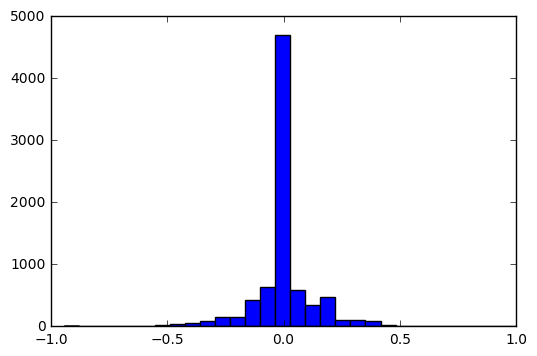

In [4]:
###############look y##############
plt.hist(y,30)
plt.show()

In [5]:
###将数据拆分成训练集和测试集合
x_train ,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=0)

print(len(x_train))
print(len(x_valid))
print(x_train.shape)

6428
1608
(6428, 3)


In [6]:
#处理图片
def processimg(image):
   
    #通过消除图像的前40像素(模型)因为它是无用的
    #移除前30个像素（水平过去）和底部25个像素（汽车的引擎盖）来预处理数据
    #调整图像大小
    #改变图像从RGB到YUV(这确实有助于平滑图像的模型有更少的信息处理)
    image = image[30:-25,:,:]
    image = cv2.resize(image,(200,66),cv2.INTER_AREA)
    image = cv2.cvtColor(image,cv2.COLOR_RGB2YUV)
    return image

In [7]:

###定义naviva的end-to-end神经网络
def naviva_network():
    model = Sequential()
    dropout=0.5

    #lay1
    model.add(Lambda(lambda x:x/127.5-1.0,input_shape=(66 ,200,3)))
    model.add(Conv2D(24,5,5))
    model.add(MaxPooling2D((2,2)))
    #model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay2
    model.add(Conv2D(36,5,5))
    model.add(MaxPooling2D((2,2)))
    #model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay3
    model.add(Conv2D(48,5,5))
    model.add(MaxPooling2D((2,2),border_mode='same'))
    #model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #lay4
    model.add(Conv2D(64,3,3))
    #model.add(Dropout(dropout))
    model.add(Activation('relu'))
    #lay5
    model.add(Conv2D(64,3,3))
    model.add(Dropout(dropout))
    model.add(Activation('relu'))

    #flatten
    model.add(Flatten())

    #fullconnected1
    #model.add(Dense(1164,activation='relu'))
    #model.add(Dropout(dropout))

    #fullconnected2
    model.add(Dense(100,activation='relu'))

    #fullconnected3
    model.add(Dense(50,activation='relu'))

    #fullconnected4
    model.add(Dense(10,activation='relu'))

    #fullconnected5
    model.add(Dense(1))

    model.summary()
    
    model_json=model.to_json()
    with open('model.json','w') as f:
        f.write(model_json)
    
    return model

In [8]:
#从图片路径中读取图片
def getImageFromTrainPath(file):
    image = mping.imread(file.strip())
    return image

In [9]:
model = naviva_network()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 66, 200, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 62, 196, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 31, 98, 24)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 31, 98, 24)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

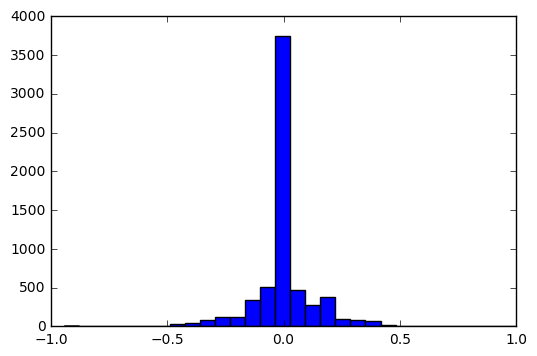

In [10]:
###############look y_train##############
plt.hist(y_train,30)
plt.show()

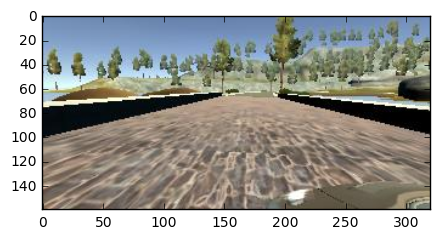

In [11]:
randindex=random.randint(0,len(x_train))
center,left,right=x[randindex]

image_temp = getImageFromTrainPath(left)
plt.figure(figsize=(5,5))
plt.imshow(image_temp)

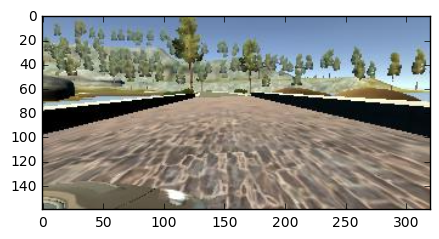

In [12]:
image_temp =cv2.flip(image_temp,1)
plt.figure(figsize=(5,5))
plt.imshow(image_temp)

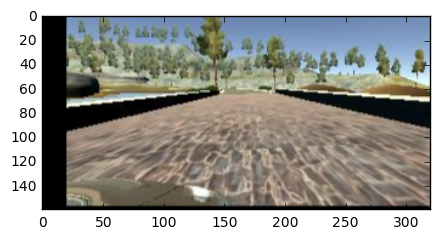

In [13]:

t_x =100*(np.random.rand()-0.5)
t_y =10*(np.random.rand()-0.5)
t_m = np.float32([[1, 0, t_x], [0, 1, t_y]])
height, width = image_temp.shape[:2]
image_temp = cv2.warpAffine(image_temp, t_m, (width, height))

plt.figure(figsize=(5,5))
plt.imshow(image_temp)

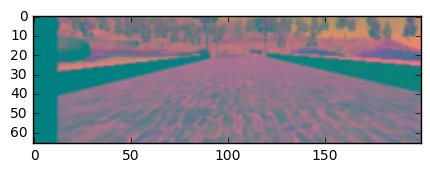

In [14]:
image_temp = processimg(image_temp)
plt.figure(figsize=(5,5))
plt.imshow(image_temp)

In [20]:
def batch_generator(x,y,batch_size):
    train_images =np.empty([batch_size,66,200,3])
    train_val = np.empty(batch_size)
    while True:
        i=0
        for step in np.random.permutation(x.shape[0]):
            center,left,right=x[step]
            steering_temp=y[step]

            ####使用中心图像,左图和右图像也沿着一些角度偏差+ - 0.2
            choice =np.random.choice(3)
            if choice==0:
                image = getImageFromTrainPath(left)
                steering=steering_temp+0.2
            elif choice ==1:
                image = getImageFromTrainPath(right)
                steering=steering_temp-0.2
            else:
                image = getImageFromTrainPath(center)
                steering=steering_temp


            ##### 将图片反转，角度也跟着反转
            if np.random.rand()<0.5:
                image =cv2.flip(image,1)
                steering=-steering

            ##### 我们在X和Y方向上移动图像以生成假图像
            tran_x =100*(np.random.rand()-0.5)
            tran_y =10*(np.random.rand()-0.5)
            steering = steering+tran_x*0.002
            trans_m = np.float32([[1, 0, tran_x], [0, 1, tran_y]])
            height, width = image.shape[:2]
            image = cv2.warpAffine(image, trans_m, (width, height))


            ###### 将图片切割小，改变图像从RGB到YUV
            image = processimg(image)
            train_images[i] = image
            train_val[i] = steering
            i += 1
            if i == batch_size:
                break
        yield train_images, train_val
        


In [21]:

#model = naviva_network()
model.compile(optimizer=Adam(lr=1.0e-4),loss='mean_squared_error')

history = model.fit_generator(batch_generator(x_train,y_train,40),
                              samples_per_epoch=2000,
                              nb_epoch=10,
                              max_q_size=1,
                              verbose=1,
                              validation_data=batch_generator(x_valid,y_valid,40),
                              nb_val_samples=len(x_valid))


Epoch 1/10
2000/2000 [==============================] - 34s - loss: 0.0443 - val_loss: 0.0379
Epoch 2/10
2000/2000 [==============================] - 28s - loss: 0.0376 - val_loss: 0.0315
Epoch 3/10
2000/2000 [==============================] - 26s - loss: 0.0319 - val_loss: 0.0268
Epoch 4/10
2000/2000 [==============================] - 26s - loss: 0.0276 - val_loss: 0.0275
Epoch 5/10
2000/2000 [==============================] - 26s - loss: 0.0275 - val_loss: 0.0238
Epoch 6/10
2000/2000 [==============================] - 22s - loss: 0.0226 - val_loss: 0.0211
Epoch 7/10
2000/2000 [==============================] - 18s - loss: 0.0205 - val_loss: 0.0208
Epoch 8/10
2000/2000 [==============================] - 17s - loss: 0.0210 - val_loss: 0.0206
Epoch 9/10
2000/2000 [==============================] - 15s - loss: 0.0203 - val_loss: 0.0193
Epoch 10/10
2000/2000 [==============================] - 15s - loss: 0.0205 - val_loss: 0.0205


In [22]:

model.save_weights('model.h5')
print('model save successed')

model save successed
